## 9. Time Series Analysis

### This script contains the following:
1. Importing libraries and data
2. Subsetting, wrangling, cleaning the time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Testing for autocorrelation
6. Stationarizing the data by differencing
7. Export stationarized data

### 1. Importing libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
path = r'C:\Users\Neena Tilton\Dropbox\Projects\MinWage_Crime'

In [4]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_newvar_2.pkl'))

In [5]:
df.head()

,Year,State,state_mw,state_mw_2020,fed_mw,fed_mw_2020,effective_mw,effective_mw_2020,prisoner_count,state_population,violent_crime,murder,robbery,burglary,incarceration_rate,rate_rank,avg_rate_of_year,viol_crime_rate
0,2001,Alabama,0.00,0.00,5.15,7.52,5.15,7.52,24741.0,4468912.0,19582.0,379.0,5584.0,40642.0,0.005536,High,0.003832,0.004382
1,2001,Alaska,5.65,8.25,5.15,7.52,5.65,8.25,4570.0,633630.0,3735.0,39.0,514.0,3847.0,0.007212,Unusually High,0.003832,0.005895
2,2001,Arizona,0.00,0.00,5.15,7.52,5.15,7.52,27710.0,5306966.0,28675.0,400.0,8868.0,54821.0,0.005221,High,0.003832,0.005403
3,2001,Arkansas,5.15,7.52,5.15,7.52,5.15,7.52,11489.0,2694698.0,12190.0,148.0,2181.0,22196.0,0.004264,Medium,0.003832,0.004524
4,2001,California,6.25,9.13,5.15,7.52,6.25,9.13,157142.0,34600464.0,212867.0,2206.0,64614.0,232273.0,0.004542,Medium,0.003832,0.006152


In [6]:
df.shape

(800, 18)

In [7]:
df.columns

Index(['Year', 'State', 'state_mw', 'state_mw_2020', 'fed_mw', 'fed_mw_2020',
       'effective_mw', 'effective_mw_2020', 'prisoner_count',
       'state_population', 'violent_crime', 'murder', 'robbery', 'burglary',
       'incarceration_rate', 'rate_rank', 'avg_rate_of_year',
       'viol_crime_rate'],
      dtype='object')

### 2. Subsetting, wrangling, cleaning

In [8]:
time_states = df[['Year', 'incarceration_rate']]

In [9]:
# Check for missing values

time_states.isnull().sum()

Year                  0
incarceration_rate    0
dtype: int64

In [10]:
time_states['Year'].value_counts()

2001    50
2002    50
2003    50
2004    50
2005    50
2006    50
2007    50
2008    50
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
Name: Year, dtype: int64

In [11]:
# Create new dataframe with 'Year' grouped and with mean value of incarceration rate.

states_agg = time_states.groupby('Year').agg({'incarceration_rate': ['mean']})

In [12]:
type(states_agg)

pandas.core.frame.DataFrame

In [13]:
states_agg.head()

,incarceration_rate
,mean
Year,
2001,0.003832
2002,0.003896
2003,0.003938
2004,0.003959
2005,0.004013


In [14]:
states_agg.dtypes

incarceration_rate  mean    float32
dtype: object

In [17]:
# Reset index column to manipulate 'Year' column as a variable

states_reset = states_agg.reset_index()

In [18]:
states_reset.head()

,Year,incarceration_rate
,,mean
0,2001,0.003832
1,2002,0.003896
2,2003,0.003938
3,2004,0.003959
4,2005,0.004013


In [19]:
from datetime import datetime

states_reset['datetime'] = pd.to_datetime(states_reset['Year'])

In [20]:
states_reset.head()

,Year,incarceration_rate,datetime
,,mean,
0,2001,0.003832,1970-01-01 00:00:00.000002001
1,2002,0.003896,1970-01-01 00:00:00.000002002
2,2003,0.003938,1970-01-01 00:00:00.000002003
3,2004,0.003959,1970-01-01 00:00:00.000002004
4,2005,0.004013,1970-01-01 00:00:00.000002005


The resulting output in the 'datetime' column is not correct because the format was not specified. 
Drop this column:

In [21]:
states_reset.drop(columns = ['datetime'])

,Year,incarceration_rate
,,mean
0,2001,0.003832
1,2002,0.003896
2,2003,0.003938
3,2004,0.003959
4,2005,0.004013
5,2006,0.004093
6,2007,0.004122
7,2008,0.004091
8,2009,0.004047


In [22]:
# To manipulate the YYYY format in 'Year' column, convert data type from integer to string. 

states_reset['Year'] = states_reset['Year'].astype(str)

In [23]:
states_reset.dtypes

Year                                object
incarceration_rate  mean           float32
datetime                    datetime64[ns]
dtype: object

In [24]:
states_reset['datetime'] = pd.to_datetime(states_reset['Year'], format='%Y')

In [25]:
states_reset.head()

,Year,incarceration_rate,datetime
,,mean,
0,2001,0.003832,2001-01-01
1,2002,0.003896,2002-01-01
2,2003,0.003938,2003-01-01
3,2004,0.003959,2004-01-01
4,2005,0.004013,2005-01-01


In [26]:
# Set datetime column as index and drop original 'Year' column

states_reset = states_reset.set_index('datetime')
states_reset.drop(['Year'], axis = 1, inplace = True)
states_reset.head()

,incarceration_rate
,mean
datetime,
2001-01-01,0.003832
2002-01-01,0.003896
2003-01-01,0.003938
2004-01-01,0.003959
2005-01-01,0.004013


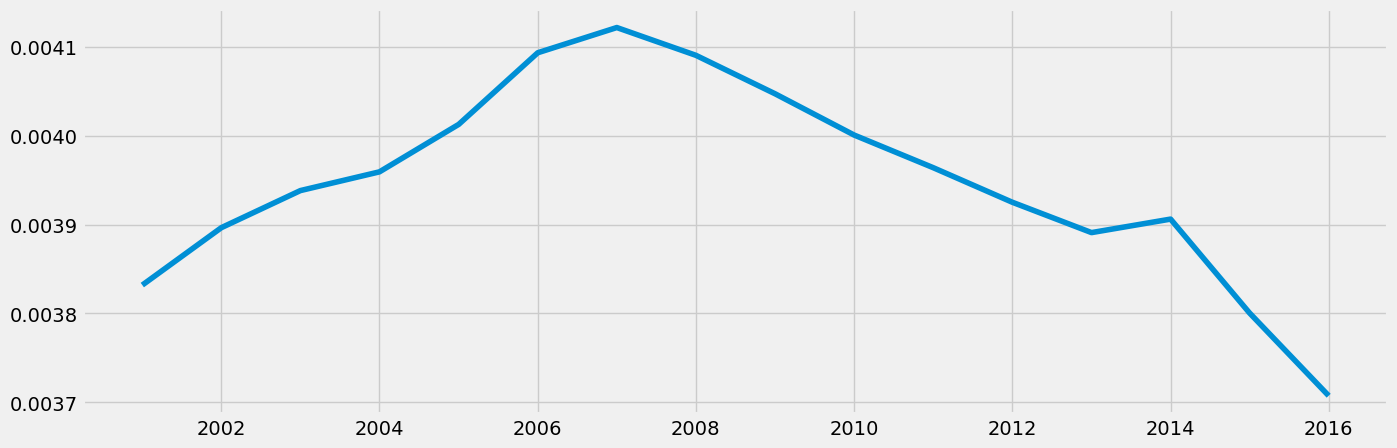

In [27]:
# Plot the time series data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(states_reset)

### 3. Time-series analysis: decomposition

In [28]:
# There is not linear trend, instead looks as though its exponential, thus decompose this time series using an multiplicative model.

decomp = sm.tsa.seasonal_decompose(states_reset, model = 'multiplicative')

In [29]:
from pylab import rcParams # To define a fixed size for all charts.

rcParams['figure.figsize'] = 18, 7

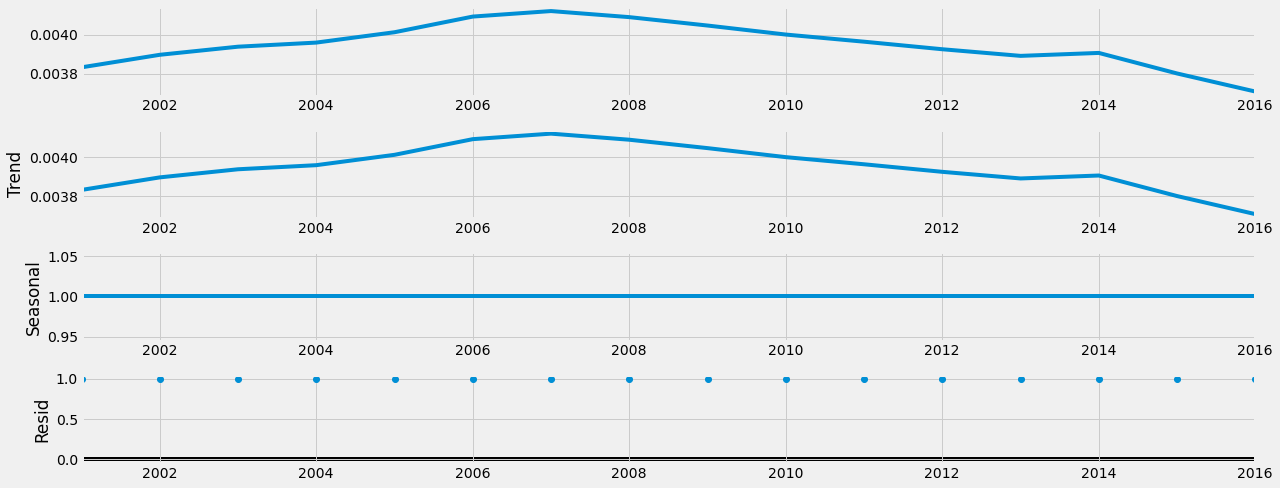

In [30]:
# Plot decomposition of time-series data

decomp.plot()
plt.show()

From the decomposition of the time-series data, we can see that there was an upward trend from 2001 to 2007, then the incarceration ratstarted to go downwards. There is no seasonality to this data. There is a consistent amount of noise unexplained by the trend. 

### 4. Testing for stationarity
To apply any forecasting model, we need the time-series data to have stationarity. Even with just a glimpse and seeing the trend line shown in the decomposition, we know that this data is not stationary. We can force stationarity onto the data by differencing. Before we do so, a Dickey-Fuller test will be conducted to see how the differencing is affecting the stationarity.  

In [31]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(states_reset['incarceration_rate'])

Dickey-Fuller Stationarity test:
Test Statistic                 2.101671
p-value                        0.998791
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


The test statistic value is not smaller than the critical value even at 10% (0.99 !< -2.77). This test statistically supports that this data set is not stationary. 

### 5. Testing for autocorrelations

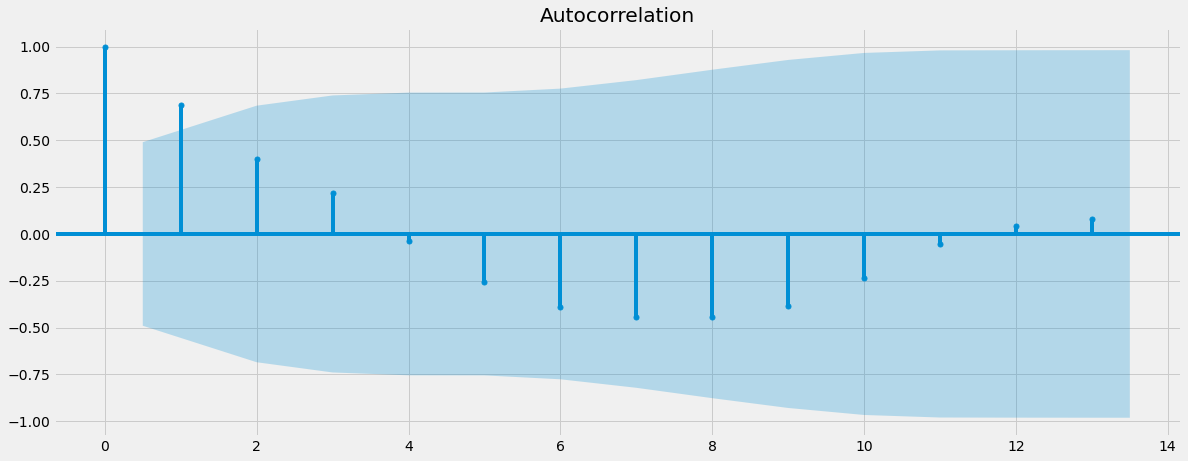

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(states_reset)
plt.show()

The indication that the data is non-stationary is not strong based on autocorrelation. 

### 6. Stationarizing the data by differencing

In [33]:
# Run initial round of differencing

data_diff = states_reset - states_reset.shift(1)

In [34]:
# Remove missing values that came about as a result of differencing. 

data_diff.dropna(inplace = True)

In [35]:
data_diff.head()

,incarceration_rate
,mean
datetime,
2002-01-01,0.000065
2003-01-01,0.000042
2004-01-01,0.000021
2005-01-01,0.000053
2006-01-01,0.000081


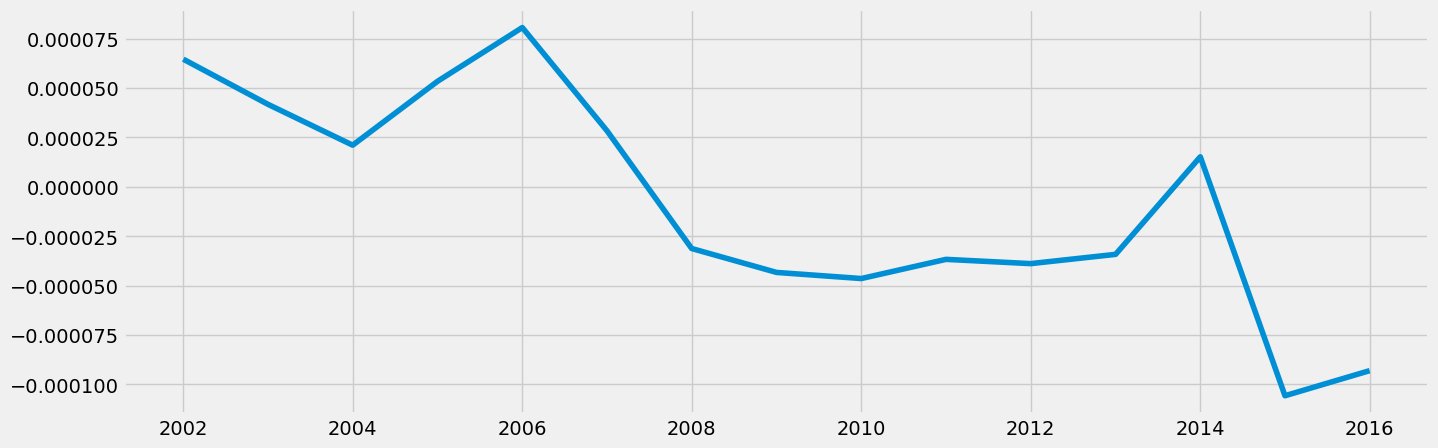

In [36]:
# Plot time-series curve of data after differencing.

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_diff)

In [37]:
# Run the Dickey-Fuller test to see if differenced data is stationary.

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.407138
p-value                         0.578849
Number of Lags Used             0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


The test statistics is still greater than the critical value even at 10% (0.57 !< -2.69) to reject the null-hypothesis and the p-value is still too large (0.58 > 0.05) to deem statistically significant. Therefore, the data at this stage is still non-stationary.

Run another round of differencing in attempt bring stationarity to the data:

In [38]:
data_diff_2 = data_diff - data_diff.shift(1)

In [39]:
data_diff_2.dropna(inplace=True)

In [40]:
data_diff_2.head()

,incarceration_rate
,mean
datetime,
2003-01-01,-0.000023
2004-01-01,-0.000021
2005-01-01,0.000032
2006-01-01,0.000027
2007-01-01,-0.000052


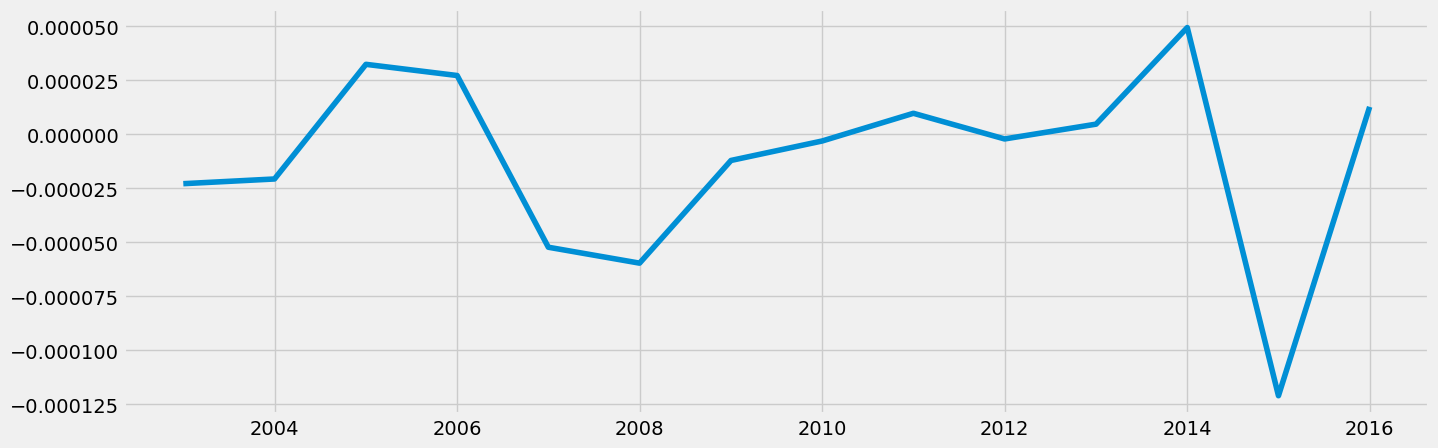

In [41]:
# Plot time-series curve of data after second round of differencing.

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_diff_2)

In [42]:
# Run the Dickey-Fuller test to see if second differenced data is stationary.

dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -5.593551
p-value                        0.000001
Number of Lags Used            5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


Here, the test statistics is now less than the critical value at 1% (-5.59 < -4.66). Also, the p-value is much much smaller than significance level of 0.05 (0.000001 << 0.05), therefore it is statistically significant. The data is now stationary and ready to be applied for forecasting.

### 7. Export stationarized dataframe

In [43]:
# Export data for future forecasting implementation.

data_diff_2.to_pickle(os.path.join(path, '02_Data', 'PreparedData', 'incrate_stationarized.pkl'))